
<div class="alert alert-block alert-info"><font size="5"><center><b><u>S17 T02: Base de dades MySQL
\begin{align*}Marc\:Breysse\end{align*}</div>

<span style=color:blue>Crear base de dades amb MySQL.</span>

# <span style=color:darkblue>Nivell 1</span>

<u style=color:blue>Exercici 1:</u>

<span style=color:blue>Crea una base de dades relacionals senzilla utilitzant MySQL(https://www.mysql.com/) i connecta-la a Python</span>

In [13]:
# Use of a downloaded database so that no need to include data -> refer to SQL script

# Connection of Pyhton to MySQL

import mysql.connector as mysql

mydb = mysql.connect(host='localhost', user='root', password='Eliot2010')
print(mydb)

if(mydb):
    print('Connection successful')
else:
    print('connection unsuccessfull')

Connection successful


In [14]:
# Verification of MySQL database list connected

mycursor = mydb.cursor()
mycursor.execute('Show databases')

for db in mycursor:
    print(db)

('database_s17_02',)
('information_schema',)
('mysql',)
('performance_schema',)
('sakila',)
('sys',)


# <span style=color:darkblue>Nivell 2</span>

<u style=color:blue>Exercici 2:</u>

<span style=color:blue>Mostra que pots carregar algunes consultes senzilles a un Pandas Dataframe.<span>

In [15]:
import pandas as pd

db = mysql.connect(
    host = "localhost",
    user = "root",
    passwd = "Eliot2010",
    database = "database_s17_02"
)

cursor = db.cursor()

In [16]:
# getting records from the table 'agents'

query = "SELECT * FROM agents"
cursor.execute(query)
records = cursor.fetchall()
for record in records:
    print(record)

('A007  ', 'Ramasundar                              ', 'Bangalore                          ', Decimal('0.15'), '077-25814763   ', '\r')
('A003  ', 'Alex                                    ', 'London                             ', Decimal('0.13'), '075-12458969   ', '\r')
('A008  ', 'Alford                                  ', 'New York                           ', Decimal('0.12'), '044-25874365   ', '\r')
('A011  ', 'Ravi Kumar                              ', 'Bangalore                          ', Decimal('0.15'), '077-45625874   ', '\r')
('A010  ', 'Santakumar                              ', 'Chennai                            ', Decimal('0.14'), '007-22388644   ', '\r')
('A012  ', 'Lucida                                  ', 'San Jose                           ', Decimal('0.12'), '044-52981425   ', '\r')
('A005  ', 'Anderson                                ', 'Brisban                            ', Decimal('0.13'), '045-21447739   ', '\r')
('A001  ', 'Subbarao                            

In [17]:
# Order company by 'company name'

query = "SELECT * FROM company ORDER BY COMPANY_NAME"
cursor.execute(query)
records = cursor.fetchall()
for record in records:
    print(record)

('16', 'Akas Foods', 'Delhi\r')
('17', 'Foodies.', 'London\r')
('15', 'Jack Hill Ltd', 'London\r')
('18', 'Order All', 'Boston\r')
('19', 'sip-n-Bite.', 'New York\r')


In [18]:
# Groupby 'order amount' from each customer

find = "SELECT CUST_CODE,sum(ORD_AMOUNT) from \
orders GROUP BY(CUST_CODE)";
cursor.execute(find) 
  
# fetching all results
data = cursor.fetchall() 
print("Total departments with count : ")
print(" ")
for res in data: 
    print(res[0],res[1],sep=" : ")  

Total departments with count : 
 
C00015 : 3500.00
C00019 : 3000.00
C00007 : 10500.00
C00016 : 2000.00
C00022 : 5000.00
C00012 : 2900.00
C00002 : 3500.00
C00003 : 2500.00
C00023 : 500.00
C00008 : 5500.00
C00025 : 5000.00
C00004 : 4200.00
C00013 : 6000.00
C00021 : 1500.00
C00011 : 3500.00
C00001 : 3000.00
C00020 : 1000.00
C00006 : 1500.00
C00005 : 2500.00
C00018 : 2000.00
C00014 : 800.00
C00009 : 5200.00
C00010 : 500.00
C00017 : 500.00
C00024 : 2500.00


In [19]:
# Order 'comission' from agents from lower to higher

query = "SELECT AGENT_NAME, COMMISSION FROM agents ORDER BY COMMISSION"
# query = "SELECT * FROM agents ORDER BY COMMISSION"      # to select all columns
cursor.execute(query)
records = cursor.fetchall()
for record in records:
    print(record)

('Mukesh                                  ', Decimal('0.11'))
('Benjamin                                ', Decimal('0.11'))
('Alford                                  ', Decimal('0.12'))
('Lucida                                  ', Decimal('0.12'))
('Alex                                    ', Decimal('0.13'))
('Anderson                                ', Decimal('0.13'))
('Santakumar                              ', Decimal('0.14'))
('Subbarao                                ', Decimal('0.14'))
('Ramasundar                              ', Decimal('0.15'))
('Ravi Kumar                              ', Decimal('0.15'))
('McDen                                   ', Decimal('0.15'))
('Ivan                                    ', Decimal('0.15'))


# <span style=color:darkblue>Nivell 3</span>

<u style=color:blue>Exercici 3:</u>

<span style=color:blue>Genera algun gràfic que resumeixi les dades.<span>


In [20]:
import numpy as np
import matplotlib.pyplot as plt 

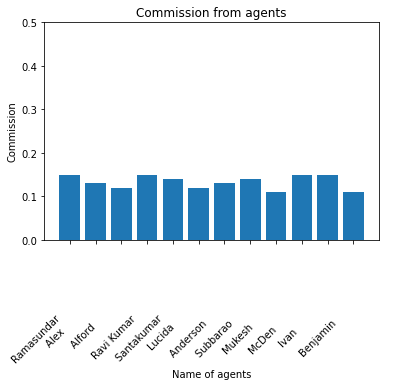

In [21]:
# Plot of the commission of each agent

cursor.execute("select AGENT_NAME, COMMISSION from agents")
result = cursor.fetchall

AGENT_NAME = []
COMMISSION = []
  
for i in cursor:
    AGENT_NAME.append(i[0])
    COMMISSION.append(i[1])

# Visulizing Data using Matplotlib
plt.bar(AGENT_NAME, COMMISSION)
plt.ylim(0, 0.5)
plt.xlabel("Name of agents")
plt.xticks(rotation=45)
plt.ylabel("Commission")
plt.title("Commission from agents")
plt.show()